In [9]:
import numpy as np
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
import os
import seaborn as sns
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import itertools
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

import pandas as pd

# Set directory
base_dir = './sets'
# Load validation set and test set
X_val = np.load(f'{base_dir}/X_val.npy')
y_val = np.load(f'{base_dir}/y_val.npy')
X_test = np.load(f'{base_dir}/X_test.npy')
y_test = np.load(f'{base_dir}/y_test.npy')

# load best sets
over_sampled_best_X_val = np.load(f'{base_dir}/over_sampled_best_X_val.npy')
under_sampled_best_X_val = np.load(f'{base_dir}/under_sampled_best_X_val.npy')
over_sampled_best_X_test = np.load(f'{base_dir}/over_sampled_best_X_test.npy')
under_sampled_best_X_test = np.load(f'{base_dir}/under_sampled_best_X_test.npy')

# make output directory
output_dir = './svm_out'
os.makedirs(output_dir, exist_ok=True)

n_features = X_val.shape[1]
n_best_over_features = over_sampled_best_X_val.shape[1]
n_best_under_features = under_sampled_best_X_val.shape[1]

# Tuning hyperparameters

In [10]:
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'] 
}



# UnderSample no selection Set

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.567 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.494 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.494 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.911 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.956 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.889 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.921 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.921 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.767 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 4/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.888 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.876 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.856 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.933 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.911 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.876 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.899 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.911 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.967 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.922 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.933 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.944 total time=   0.0s
[CV 1/5] END ....C=0.1, gamm

Text(0.5, 1.0, 'Confusion Matrix')

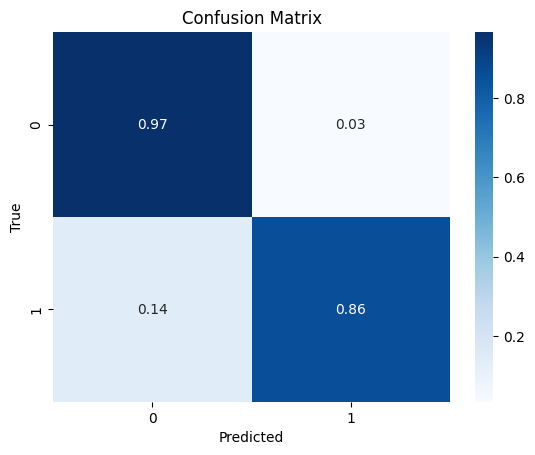

In [11]:
svc = svm.SVC()

clf = GridSearchCV(svc, param_grid, refit=True, verbose=3, scoring='accuracy' ,return_train_score=False)

X_train = np.load(f'{base_dir}/under_sampled_X_train.npy')
y_train = np.load(f'{base_dir}/under_sampled_y_train.npy')

y_train = y_train.ravel()

clf.fit(X_train, y_train)

best_params = clf.best_params_

best_score = clf.best_score_

print(f'Best score: {best_score}')
print(f'Best params: {best_params}')

# Predict the test set
y_pred = clf.predict(X_test)

acc = np.mean(y_pred == y_test)
print(f'Accuracy: {acc}')

output = f'{output_dir}/under_sampled_no_selection/'

os.makedirs(output_dir + "/under_sampled_no_selection", exist_ok=True)

# save the model
dump(clf, f'{output}/model.joblib')

# save the best params
with open(f'{output}/best_params.txt', 'w') as f:
    f.write(str(best_params))

# save the best score
with open(f'{output}/best_score.txt', 'w') as f:
    f.write(str(best_score))

# save the accuracy
with open(f'{output}/accuracy.txt', 'w') as f:
    f.write(str(acc))

# save the classification report
report = classification_report(y_test, y_pred, output_dict=True)
with open(f'{output}/classification_report.txt', 'w') as f:
    f.write(str(report))

df = pd.DataFrame(clf.cv_results_)

df.to_csv(f'{output}/cv_results.csv', index=False)

# save the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')


# UnderSample Best Selection Set

Shape of X_train:  (448, 9)
Shape of y_train:  (448,)
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.567 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.678 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.494 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.494 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.967 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.910 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.888 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.578 total time= 

Text(0.5, 1.0, 'Confusion Matrix')

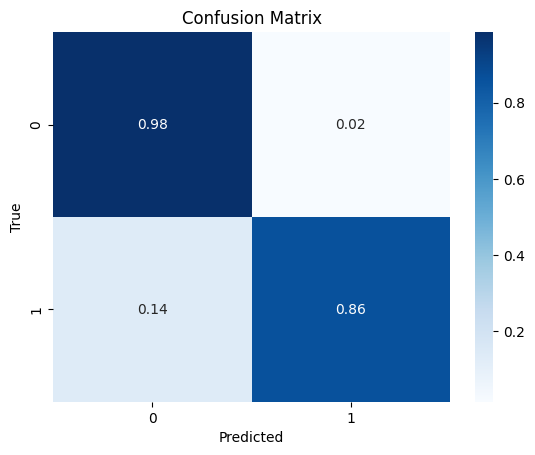

In [12]:
svc = svm.SVC()

clf = GridSearchCV(svc, param_grid, refit=True, verbose=3, scoring='accuracy' ,return_train_score=False)

X_train = np.load(f'{base_dir}/under_sampled_best_X_train.npy')
y_train = np.load(f'{base_dir}/under_sampled_y_train.npy')

y_train = y_train.ravel()
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
clf.fit(X_train, y_train)

best_params = clf.best_params_

best_score = clf.best_score_

print(f'Best score: {best_score}')
print(f'Best params: {best_params}')

# Predict the test set
y_pred = clf.predict(under_sampled_best_X_test)

acc = np.mean(y_pred == y_test)
print(f'Accuracy: {acc}')

output = f'{output_dir}/under_sampled_best_selection/'

os.makedirs(output_dir + "/under_sampled_best_selection", exist_ok=True)

# save the model
dump(clf, f'{output}/model.joblib')

# save the best params
with open(f'{output}/best_params.txt', 'w') as f:
    f.write(str(best_params))

# save the best score
with open(f'{output}/best_score.txt', 'w') as f:
    f.write(str(best_score))

# save the accuracy
with open(f'{output}/accuracy.txt', 'w') as f:
    f.write(str(acc))

# save the classification report
report = classification_report(y_test, y_pred, output_dict=True)
with open(f'{output}/classification_report.txt', 'w') as f:
    f.write(str(report))

df = pd.DataFrame(clf.cv_results_)

df.to_csv(f'{output}/cv_results.csv', index=False)

# save the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

